### Overview of The New Dataset

- Get the sum of the tag in this period starting from Jan, 21st, 2020 to Jul, 21st, 2021

In [23]:
import pandas as pd
updatedData = pd.read_csv("Updated Asians American NYT Dataset.csv")
updatedData.drop(["headline", "news_desk", "url"], axis=1).agg("sum", axis=0)

date                                        2021-07-272021-07-212021-07-212021-07-192021-0...
word_count                                                                           222582.0
Hate Crimes                                                                              67.0
Discrimination                                                                          107.0
Race and Ethnicity                                                                       76.0
Atlanta Spa Shootings (2021)                                                             42.0
Murders, Attempted Murders and Homicides                                                 22.0
Demonstrations, Protests and Riots                                                        5.0
Mass Shootings                                                                            3.0
Quarantine (Life and Culture)                                                             7.0
Assaults                                                    

- Count value in the news_desk to see the categories that has the most values

In [24]:
updatedData.loc[::, ["news_desk"]].value_counts()

# Based on the count, we can see around 10 articles are not in any news_desk. Note that one article is only tagged with one news_desk
# National and U.S. news desk - What's the difference?

news_desk     
National          31
OpEd              23
Culture           22
Metro             22
Express           15
Washington        10
Arts&Leisure       9
Sports             6
Politics           6
Business           5
Letters            5
SundayBusiness     4
Styles             4
Podcasts           4
U.S.               3
Well               3
Magazine           3
Metropolitan       3
Dining             2
Obits              2
Weekend            2
Investigative      2
Editorial          2
Business Day       1
AtHome             1
BookReview         1
TStyle             1
T Magazine         1
NYTNow             1
Summary            1
Climate            1
Science            1
Parenting          1
Opinion            1
Arts               1
dtype: int64

- Average and max word counts for the articles
- Divide the articles by tag?

In [25]:
updatedData["word_count"].max()

3156.0

In [26]:
updatedData.loc[updatedData["word_count"].idxmax()]

headline                                                               Did I Just Get Yanged?
date                                                                               2020-01-31
news_desk                                                                                OpEd
word_count                                                                             3156.0
Hate Crimes                                                                               0.0
Discrimination                                                                            0.0
Race and Ethnicity                                                                        0.0
Atlanta Spa Shootings (2021)                                                              0.0
Murders, Attempted Murders and Homicides                                                  0.0
Demonstrations, Protests and Riots                                                        0.0
Mass Shootings                                              

In [27]:
updatedData["word_count"].mean()

1059.9142857142858

- Numbers of articles that have at least 1 tag on them

In [28]:
zeroData = updatedData.iloc[::, range(4, 16)]
zeroList = zeroData.any(axis='columns')
zeroList

0       True
1       True
2       True
3      False
4       True
       ...  
205    False
206     True
207    False
208    False
209    False
Length: 210, dtype: bool

In [29]:
zeroList.value_counts()
# 42 articles do not have any tags we mentioned

True     168
False     42
dtype: int64

## Word Cloud Visualization

### Generate Wordcloud with Headlines from The Pandemic Time

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Imported from the article in https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f
# change the value to black

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    # Function to create color visualizations
    return("hsl(0,100%, 1%)")

headlines = " ".join(" ".join(headline.split(" ")) for headline in updatedData["headline"])
cloud = WordCloud(background_color="white", width=3000, height=2000, max_words=300).generate_from_text(headlines)
cloud.recolor(color_func=black_color_func)

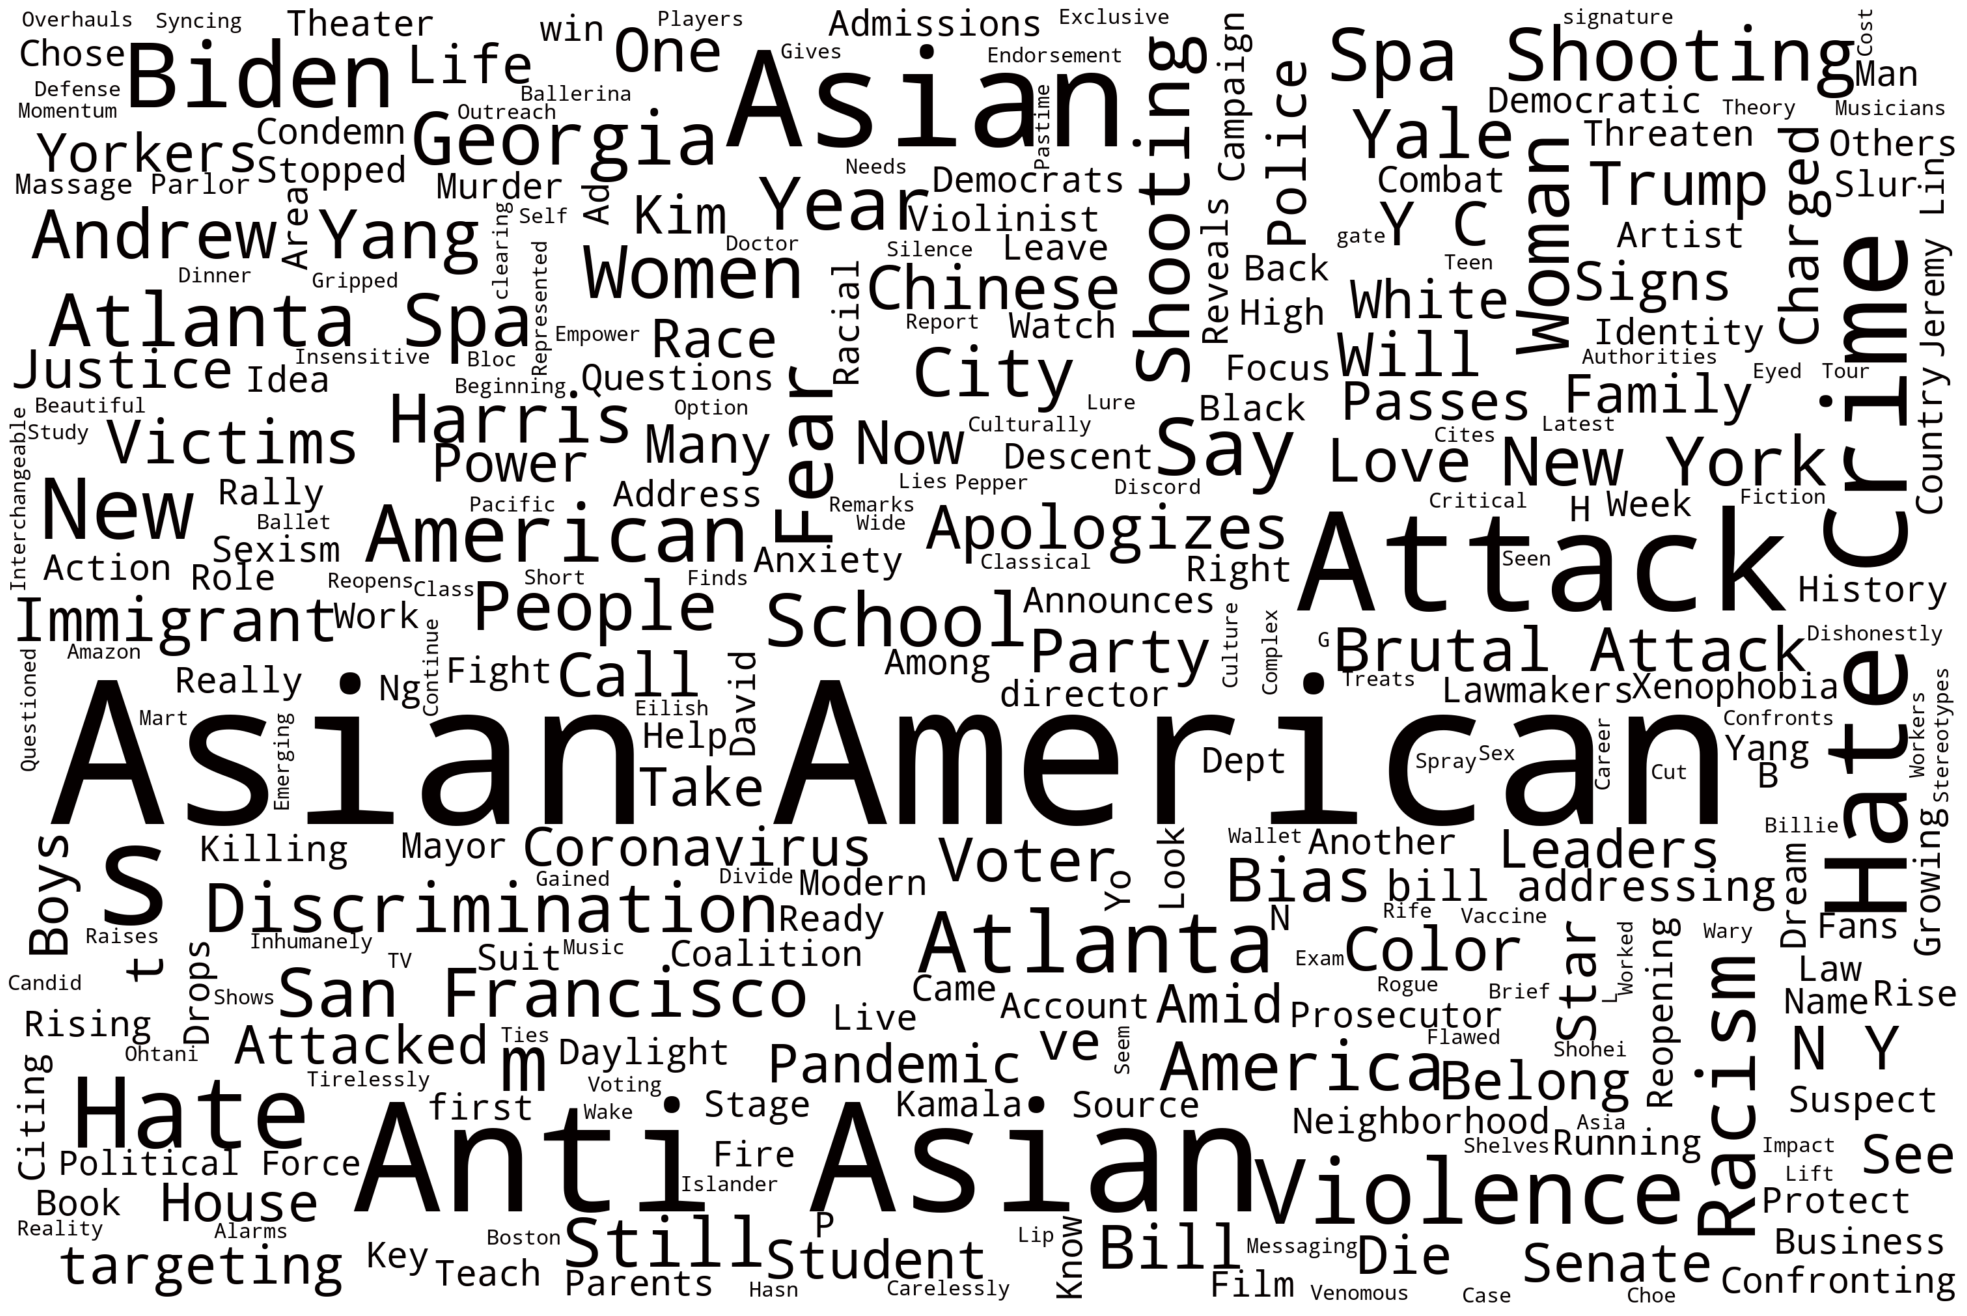

In [72]:
fig = plt.figure(figsize=[35, 30])
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('Pandemic Word Cloud.png', bbox_inches="tight")
plt.show()

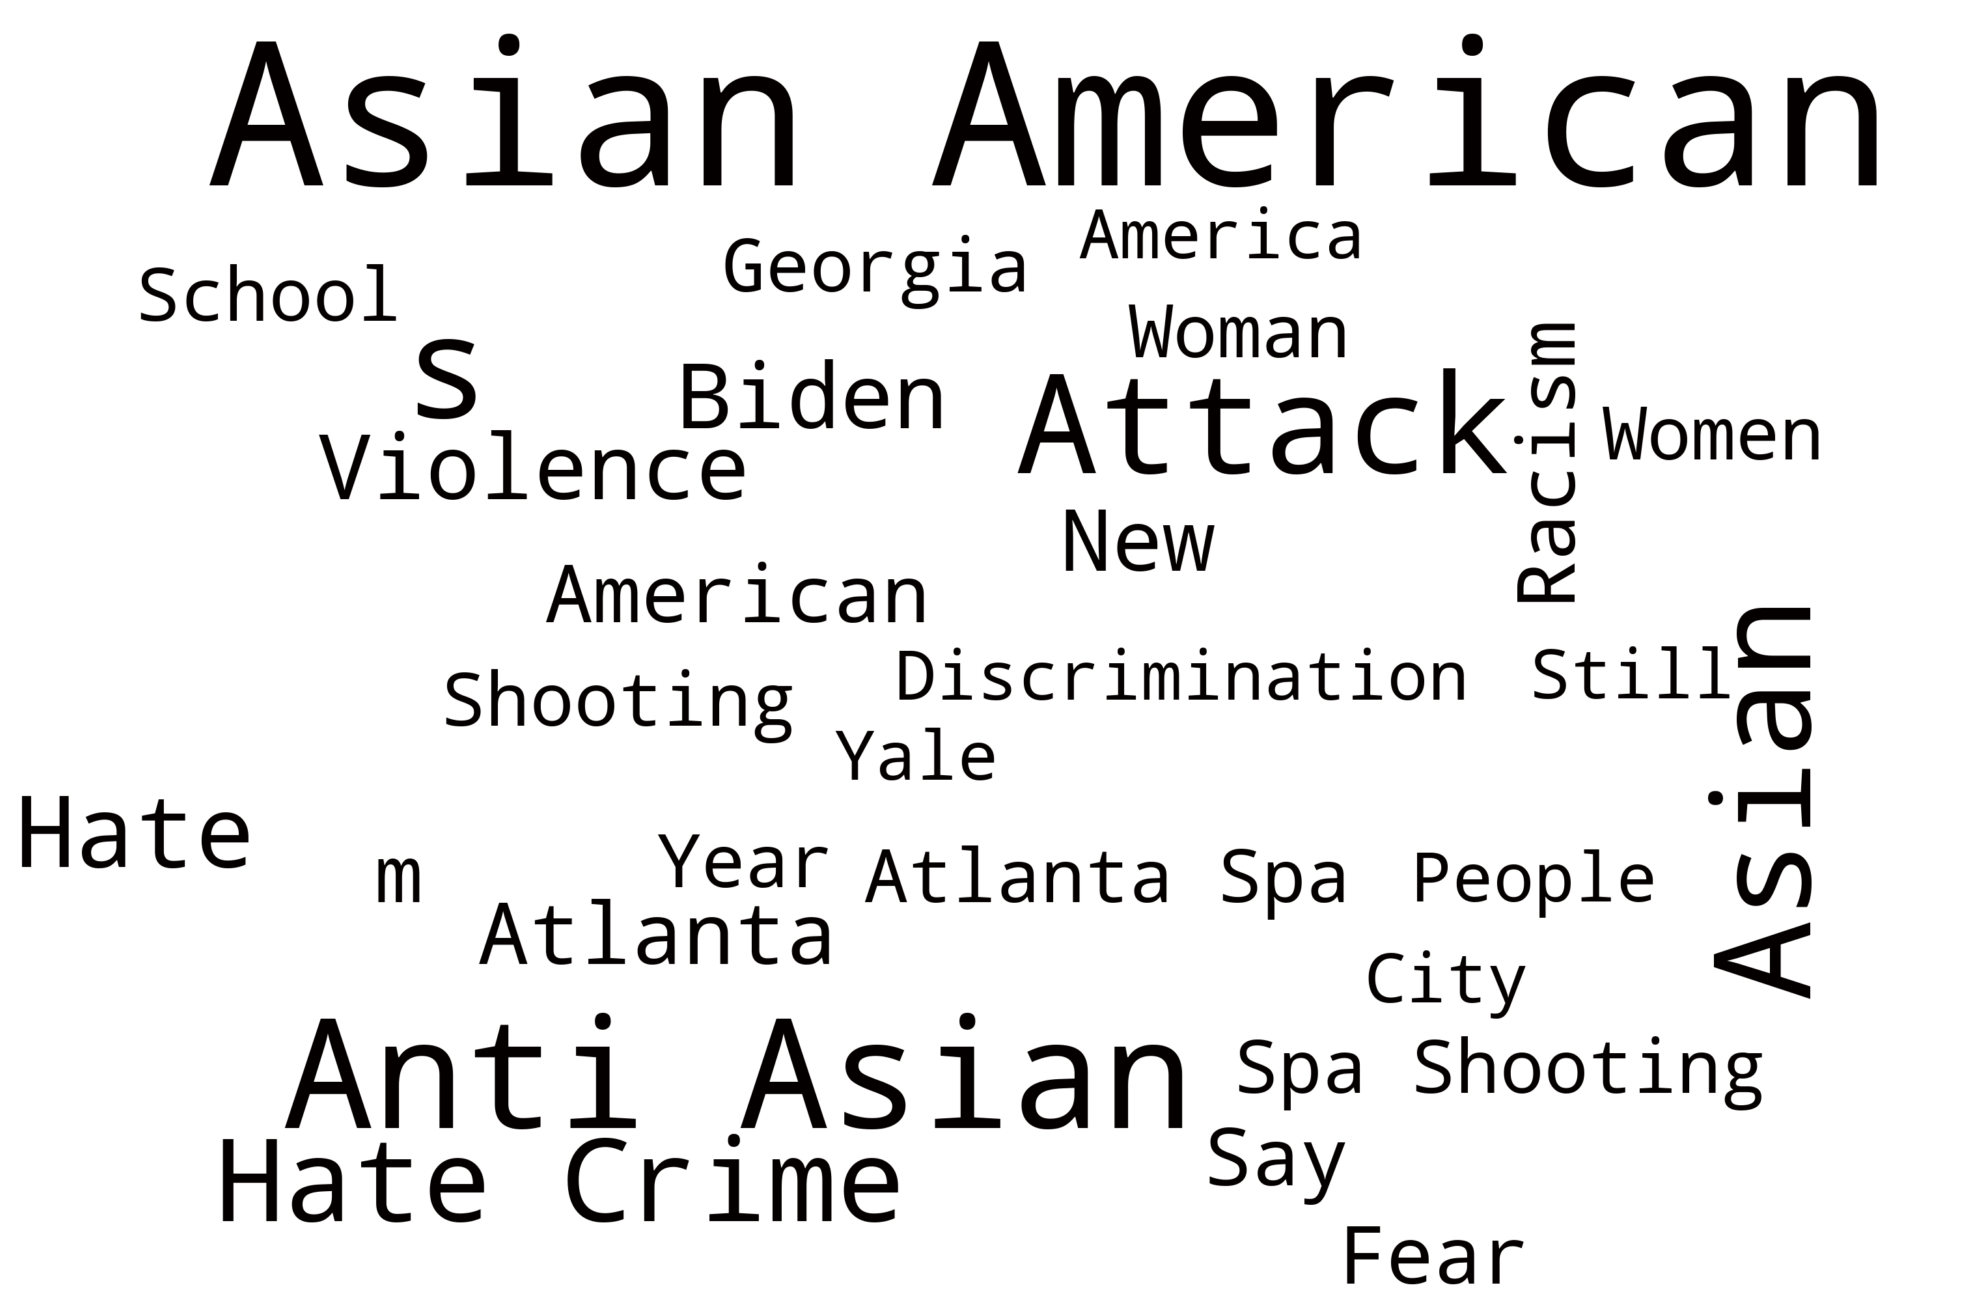

In [70]:
cloud = WordCloud(background_color="white", width=3000, height=2000, max_words=30).generate_from_text(headlines)
cloud.recolor(color_func=black_color_func)

fig = plt.figure(figsize=[35, 30])
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('Pandemic Limited Word Cloud.png', bbox_inches="tight")
plt.show()

### Generate Wordcloud with All Headlines

In [33]:
allData = pd.read_csv("Asians American NYT Dataset.csv")
all = " ".join(headline for headline in allData["headline"])
cloud = WordCloud(background_color="white", width=3000, height=2000).generate_from_text(all)
cloud.recolor(color_func=black_color_func)

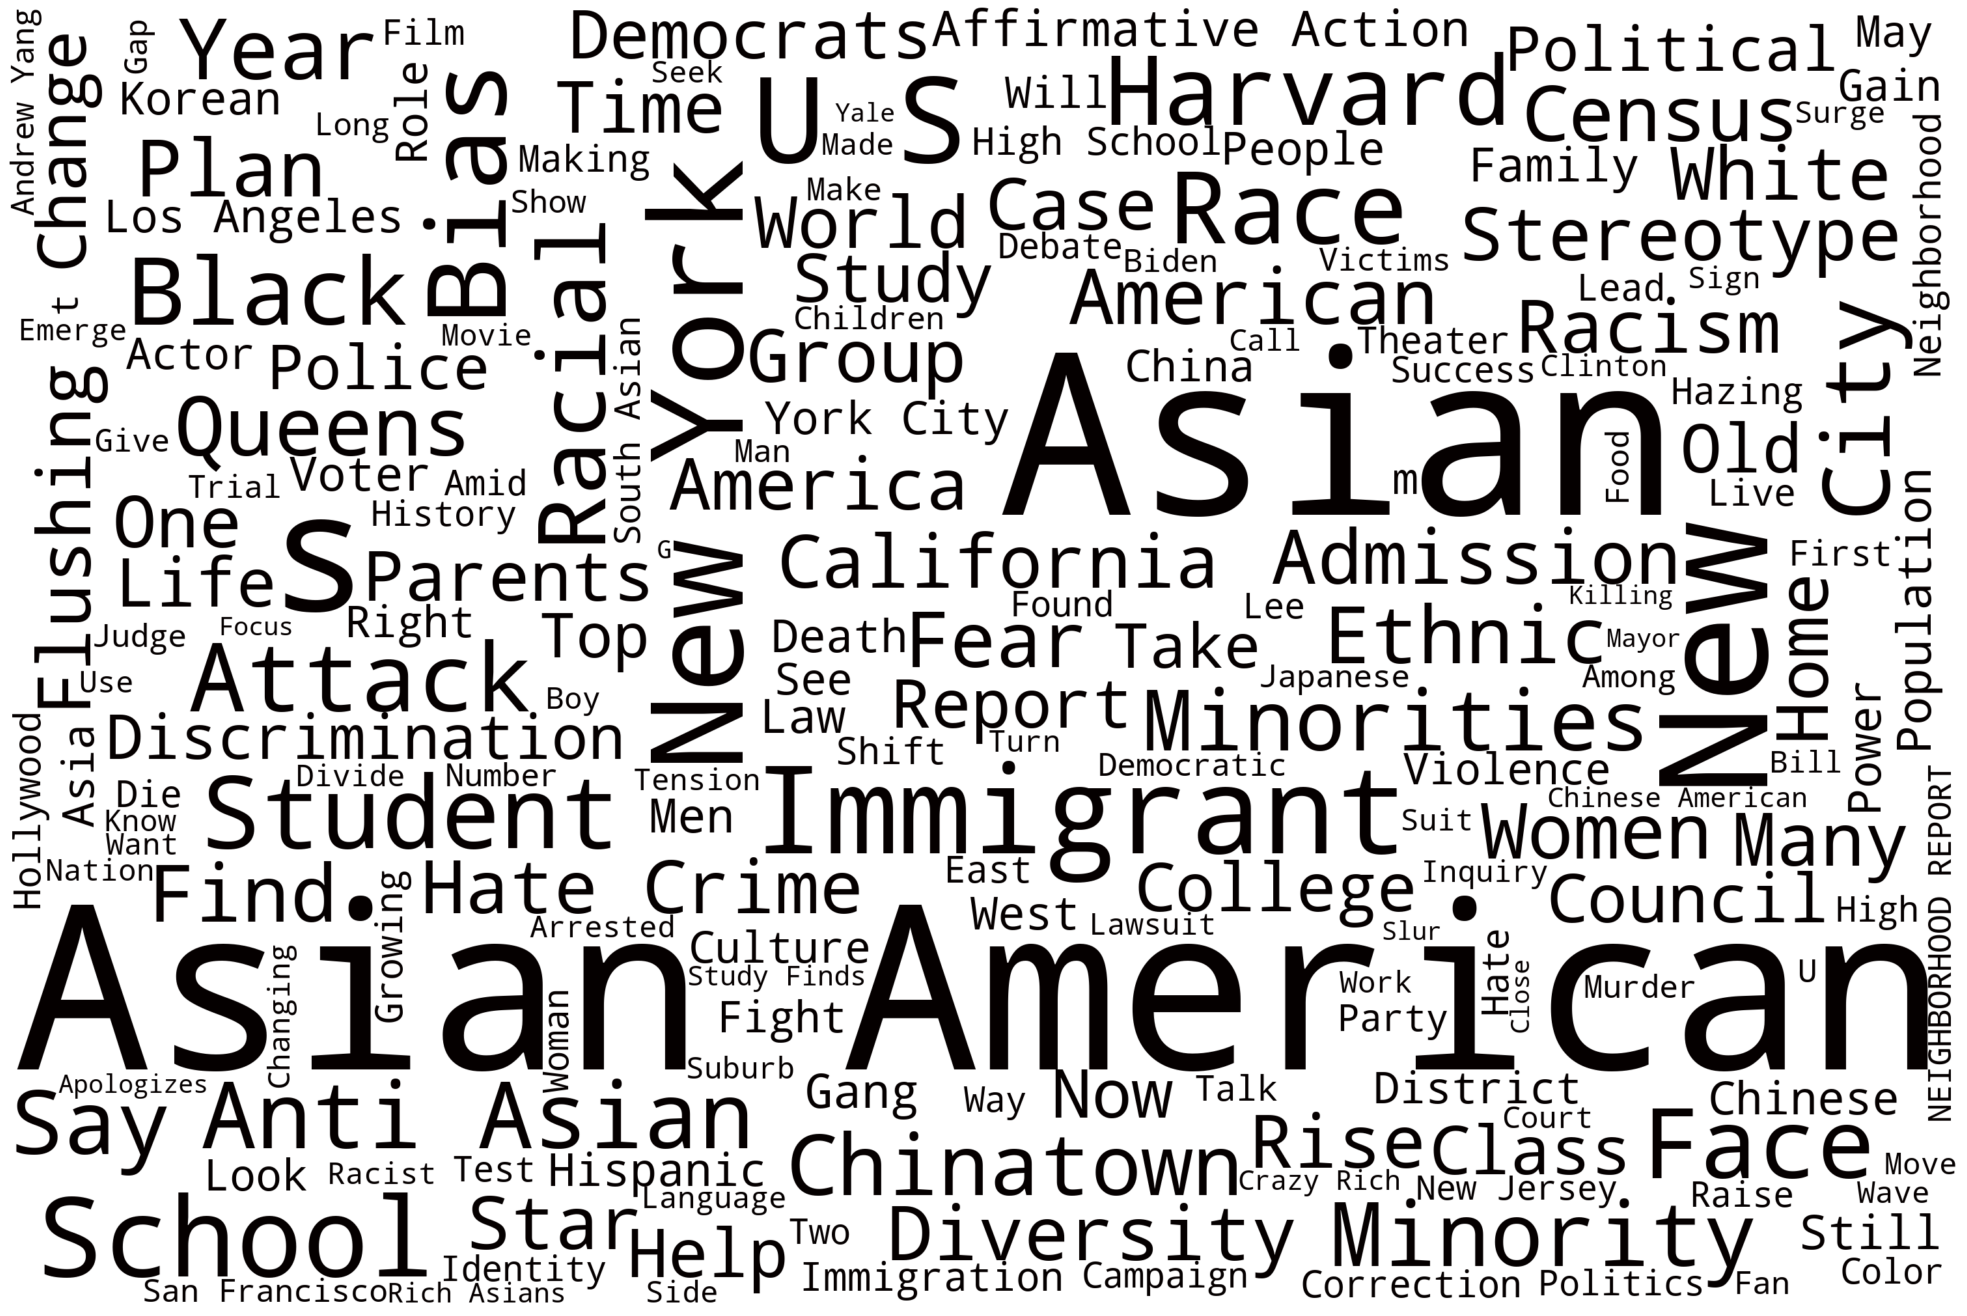

In [34]:
fig = plt.figure(figsize=[35, 30])
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('All Word Cloud.png', bbox_inches="tight")
plt.show()

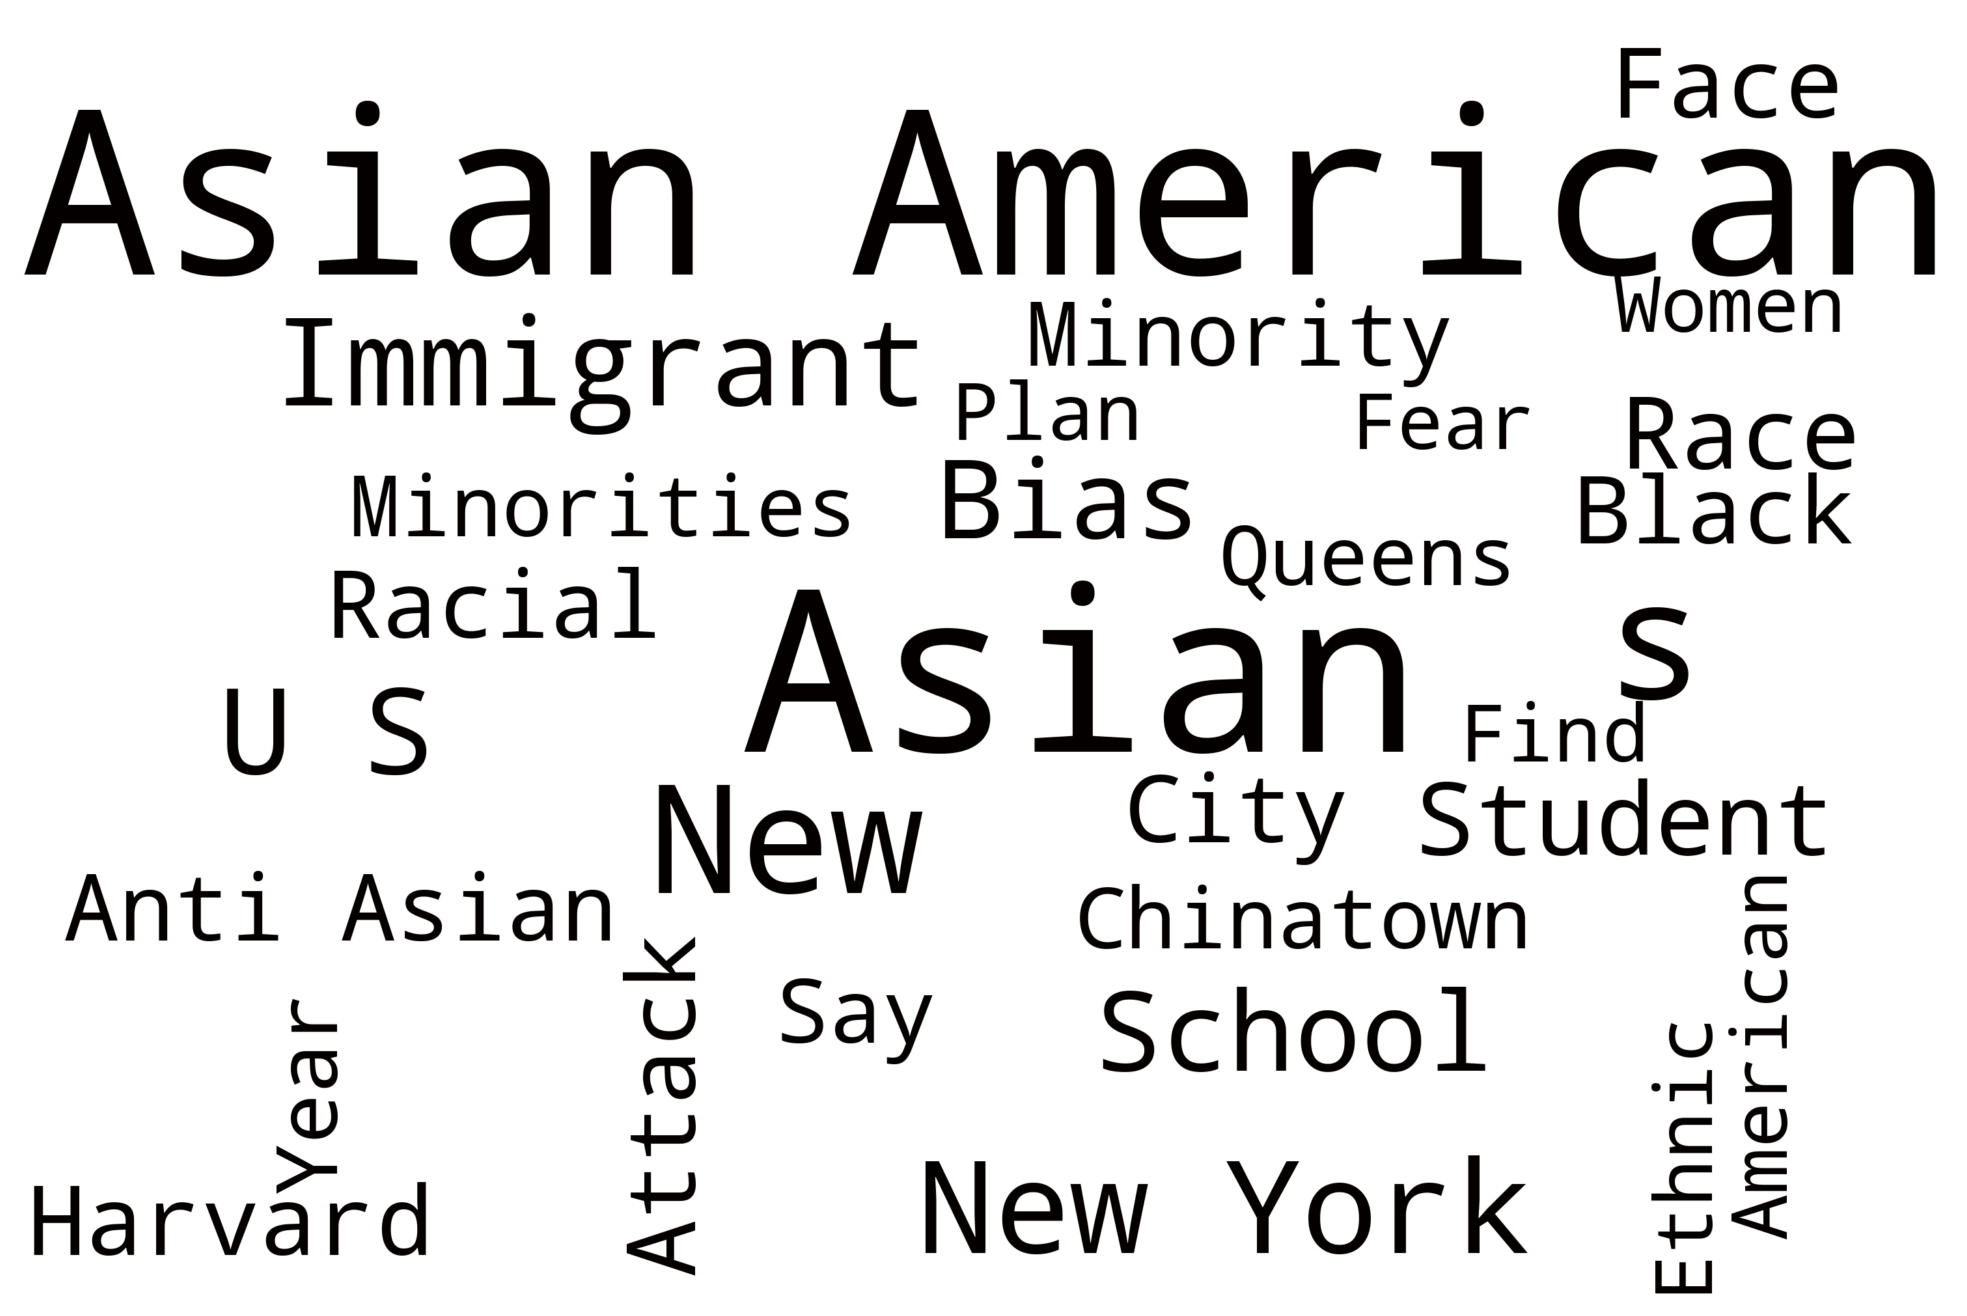

In [35]:
cloud = WordCloud(background_color="white", width=3000, height=2000, max_words=30).generate_from_text(all)
cloud.recolor(color_func=black_color_func)
fig = plt.figure(figsize=[35, 30])
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('All Limited Word Cloud.png',  bbox_inches="tight")
plt.show()

## Exploratory Analysis
### Update the date aggregrated data with the US Covid Cases

In [36]:
covidData = pd.read_csv("us.csv")
print(covidData.dtypes)

date      object
cases      int64
deaths     int64
dtype: object


In [37]:
merged = pd.merge(covidData, updatedData, on=["date"])
merged = merged.drop(['headline', 'news_desk', 'url'], axis=1)

# Choose the date beginning of the pandemic in the US from https://www.census.gov/popclock/
citizen = 331211595

for i, item in enumerate(merged["cases"]):
    merged.loc[i,"deaths"] = merged.loc[i,"deaths"] * 100 / item
    merged.loc[i,"cases"] = item * 100 / citizen
merged.head(10)

date         cases  deaths  word_count  Hate Crimes  Discrimination  \
0  2020-01-25  9.057654e-07     0.0       927.0          0.0             0.0   
1  2020-01-30  1.811531e-06     0.0       327.0          0.0             0.0   
2  2020-01-31  2.113453e-06     0.0      3156.0          0.0             0.0   
3  2020-02-11  3.924983e-06     0.0      1075.0          0.0             0.0   
4  2020-02-12  4.226905e-06     0.0      1408.0          0.0             0.0   
5  2020-02-12  4.226905e-06     0.0      1254.0          0.0             0.0   
6  2020-02-14  4.528827e-06     0.0      1176.0          0.0             1.0   
7  2020-02-15  4.528827e-06     0.0      1251.0          0.0             0.0   
8  2020-02-16  4.528827e-06     0.0      1357.0          0.0             1.0   
9  2020-02-17  7.548045e-06     0.0       910.0          0.0             0.0   

   Race and Ethnicity  Atlanta Spa Shootings (2021)  \
0                 0.0                           0.0   
1                 0.0                           0.0   
2                 0.0                           0.0   
3                 0.0                           0.0   
4                 0.0                           0.0   
5                 0.0                           0.0   
6                 1.0                           0.0   
7                 1.0                           0.0   
8                 0.0                           0.0   
9                 0.0                           0.0   

   Murders, Attempted Murders and Homicides  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
5                                       0.0   
6                                       0.0   
7                                       0.0   
8                                       0.0   
9                                       0.0   

   Demonstrations, Protests and Riots  Mass Shootings  \
0                                 0.0             0.0   
1                                 0.0             0.0   
2                                 0.0             0.0   
3                                 0.0             0.0   
4                                 0.0             0.0   
5                                 0.0             0.0   
6                                 0.0             0.0   
7                                 0.0             0.0   
8                                 0.0             0.0   
9                                 0.0             0.0   

   Quarantine (Life and Culture)  Assaults  Minorities  \
0                            0.0       0.0         0.0   
1                            0.0       0.0         0.0   
2                            0.0       0.0         0.0   
3                            0.0       0.0         1.0   
4                            0.0       0.0         0.0   
5                            0.0       0.0         0.0   
6                            0.0       0.0         0.0   
7                            0.0       0.0         0.0   
8                            0.0       0.0         0.0   
9                            0.0       0.0         0.0   

   Workplace Hazards and Violations  Coronavirus (2019-nCoV)  
0                               0.0                      0.0  
1                               0.0                      0.0  
2                               0.0                      0.0  
3                               0.0                      0.0  
4                               0.0                      0.0  
5                               0.0                      0.0  
6                               0.0                      0.0  
7                               0.0                      0.0  
8                               0.0                      1.0  
9                               0.0                      0.0

In [38]:
pandemicData = merged.loc[:, merged.columns.intersection(["date", "deaths", "cases"])].drop_duplicates()
pandemicData

date         cases    deaths
0    2020-01-25  9.057654e-07  0.000000
1    2020-01-30  1.811531e-06  0.000000
2    2020-01-31  2.113453e-06  0.000000
3    2020-02-11  3.924983e-06  0.000000
4    2020-02-12  4.226905e-06  0.000000
..          ...           ...       ...
201  2021-07-14  1.024492e+01  1.791108
204  2021-07-15  1.025567e+01  1.790225
205  2021-07-18  1.027814e+01  1.787713
206  2021-07-19  1.029499e+01  1.785463
207  2021-07-21  1.033256e+01  1.781009

[132 rows x 3 columns]

### Heat Map Visualization For Correlation
- Group by date

In [39]:
dateData = merged.drop([ "deaths", "cases"], axis=1).groupby(["date"]).sum()
dateData = pd.merge(pandemicData, dateData, on=["date"])
dateData

date         cases    deaths  word_count  Hate Crimes  \
0    2020-01-25  9.057654e-07  0.000000       927.0          0.0   
1    2020-01-30  1.811531e-06  0.000000       327.0          0.0   
2    2020-01-31  2.113453e-06  0.000000      3156.0          0.0   
3    2020-02-11  3.924983e-06  0.000000      1075.0          0.0   
4    2020-02-12  4.226905e-06  0.000000      2662.0          0.0   
..          ...           ...       ...         ...          ...   
127  2021-07-14  1.024492e+01  1.791108      4204.0          2.0   
128  2021-07-15  1.025567e+01  1.790225      1480.0          0.0   
129  2021-07-18  1.027814e+01  1.787713      1387.0          1.0   
130  2021-07-19  1.029499e+01  1.785463      1516.0          0.0   
131  2021-07-21  1.033256e+01  1.781009      3566.0          0.0   

     Discrimination  Race and Ethnicity  Atlanta Spa Shootings (2021)  \
0               0.0                 0.0                           0.0   
1               0.0                 0.0                           0.0   
2               0.0                 0.0                           0.0   
3               0.0                 0.0                           0.0   
4               0.0                 0.0                           0.0   
..              ...                 ...                           ...   
127             1.0                 1.0                           0.0   
128             0.0                 1.0                           0.0   
129             1.0                 0.0                           0.0   
130             0.0                 0.0                           0.0   
131             2.0                 2.0                           0.0   

     Murders, Attempted Murders and Homicides  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
..                                        ...   
127                                       0.0   
128                                       0.0   
129                                       0.0   
130                                       0.0   
131                                       0.0   

     Demonstrations, Protests and Riots  Mass Shootings  \
0                                   0.0             0.0   
1                                   0.0             0.0   
2                                   0.0             0.0   
3                                   0.0             0.0   
4                                   0.0             0.0   
..                                  ...             ...   
127                                 0.0             0.0   
128                                 0.0             0.0   
129                                 0.0             0.0   
130                                 0.0             0.0   
131                                 0.0             0.0   

     Quarantine (Life and Culture)  Assaults  Minorities  \
0                              0.0       0.0         0.0   
1                              0.0       0.0         0.0   
2                              0.0       0.0         0.0   
3                              0.0       0.0         1.0   
4                              0.0       0.0         0.0   
..                             ...       ...         ...   
127                            0.0       1.0         0.0   
128                            0.0       0.0         0.0   
129                            0.0       1.0         0.0   
130                            0.0       0.0         0.0   
131                            0.0       0.0         0.0   

     Workplace Hazards and Violations  Coronavirus (2019-nCoV)  
0                                 0.0                      0.0  
1                                 0.0                      0.0  
2                                 0.0                      0.0  
3                                 0.0 

In [40]:
heatmap = dateData

tags = {'Hate Crimes',
        'Discrimination',
        'Race and Ethnicity',
        'Atlanta Spa Shootings (2021)',
        'Murders, Attempted Murders and Homicides',
        'Demonstrations, Protests and Riots',
        'Mass Shootings',
        'Quarantine (Life and Culture)',
        'Assaults',
        'Minorities',
        'Workplace Hazards and Violations',
        'Coronavirus (2019-nCoV)'}

for i in range(1, len(dateData)):
    for tag in tags:
        heatmap.loc[i, tag] += heatmap.loc[i - 1, tag]

heatmap.head(20)

date         cases    deaths  word_count  Hate Crimes  \
0   2020-01-25  9.057654e-07  0.000000       927.0          0.0   
1   2020-01-30  1.811531e-06  0.000000       327.0          0.0   
2   2020-01-31  2.113453e-06  0.000000      3156.0          0.0   
3   2020-02-11  3.924983e-06  0.000000      1075.0          0.0   
4   2020-02-12  4.226905e-06  0.000000      2662.0          0.0   
5   2020-02-14  4.528827e-06  0.000000      1176.0          0.0   
6   2020-02-15  4.528827e-06  0.000000      1251.0          0.0   
7   2020-02-16  4.528827e-06  0.000000      1357.0          0.0   
8   2020-02-17  7.548045e-06  0.000000       910.0          0.0   
9   2020-02-19  7.548045e-06  0.000000       520.0          0.0   
10  2020-03-03  3.774022e-05  8.000000      1566.0          0.0   
11  2020-03-12  5.036056e-04  2.577938       446.0          0.0   
12  2020-03-19  3.741717e-03  1.710643      1064.0          0.0   
13  2020-03-23  1.313511e-02  1.330882      2468.0          1.0   
14  2020-03-28  3.742804e-02  1.855347      1181.0          1.0   
15  2020-03-29  4.301963e-02  1.907556      1517.0          1.0   
16  2020-04-04  9.435811e-02  3.035917      1160.0          1.0   
17  2020-04-10  1.507755e-01  4.221985      4533.0          1.0   
18  2020-04-12  1.685475e-01  4.451240      2860.0          1.0   
19  2020-04-13  1.763278e-01  4.556880         0.0          1.0   

    Discrimination  Race and Ethnicity  Atlanta Spa Shootings (2021)  \
0              0.0                 0.0                           0.0   
1              0.0                 0.0                           0.0   
2              0.0                 0.0                           0.0   
3              0.0                 0.0                           0.0   
4              0.0                 0.0                           0.0   
5              1.0                 1.0                           0.0   
6              1.0                 2.0                           0.0   
7              2.0                 2.0                           0.0   
8              2.0                 2.0                           0.0   
9              2.0                 2.0                           0.0   
10             3.0                 2.0                           0.0   
11             3.0                 2.0                           0.0   
12             4.0                 3.0                           0.0   
13             6.0                 4.0                           0.0   
14             6.0                 4.0                           0.0   
15             7.0                 5.0                           0.0   
16             7.0                 5.0                           0.0   
17             9.0                 5.0                           0.0   
18            10.0                 6.0                           0.0   
19            10.0                 6.0                           0.0   

    Murders, Attempted Murders and Homicides  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
5                                        0.0   
6                                        0.0   
7                                        0.0   
8                                        0.0   
9                                        0.0   
10                                       0.0   
11                                       0.0   
12                                       0.0   
13                                       0.0   
14                                       0.0   
15                                       0.0   
16                                       0.0   
17                                       0.0   
18                                       0.0   
19                                       0.0   

    Demonstrations, Protests and Riots  Mass Shootings  \
0                     

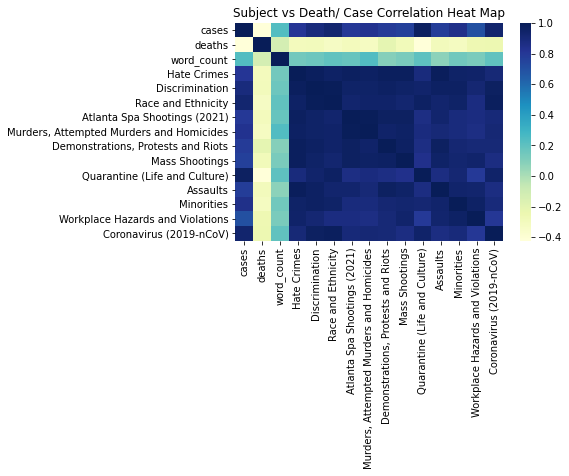

In [43]:
%matplotlib inline
import seaborn as sns

correlations = heatmap.corr()
ax = plt.axes()
fig = sns.heatmap(correlations, cmap="YlGnBu", ax=ax)
ax.set_title("Subject vs Death/ Case Correlation Heat Map")
plt.savefig("Correlation Heat Map",bbox_inches="tight" )
plt.show()

#### Correlations for cases per total US populations

In [44]:
correlations["cases"]

cases                                       1.000000
deaths                                     -0.421852
word_count                                  0.234774
Hate Crimes                                 0.813386
Discrimination                              0.888925
Race and Ethnicity                          0.930256
Atlanta Spa Shootings (2021)                0.804133
Murders, Attempted Murders and Homicides    0.836923
Demonstrations, Protests and Riots          0.791835
Mass Shootings                              0.771186
Quarantine (Life and Culture)               0.969540
Assaults                                    0.781444
Minorities                                  0.850155
Workplace Hazards and Violations            0.703027
Coronavirus (2019-nCoV)                     0.936542
Name: cases, dtype: float64

#### Correlations for percentages of deaths over cases

In [45]:
correlations["deaths"]

cases                                      -0.421852
deaths                                      1.000000
word_count                                 -0.126500
Hate Crimes                                -0.296197
Discrimination                             -0.291328
Race and Ethnicity                         -0.326621
Atlanta Spa Shootings (2021)               -0.298806
Murders, Attempted Murders and Homicides   -0.318378
Demonstrations, Protests and Riots         -0.204335
Mass Shootings                             -0.282699
Quarantine (Life and Culture)              -0.418001
Assaults                                   -0.292104
Minorities                                 -0.313824
Workplace Hazards and Violations           -0.252557
Coronavirus (2019-nCoV)                    -0.249162
Name: deaths, dtype: float64

### Cases percentage versus the count for the article

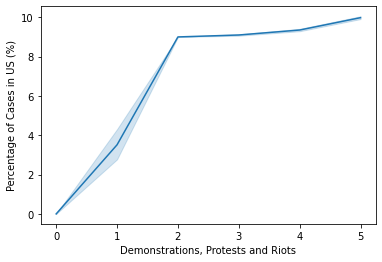

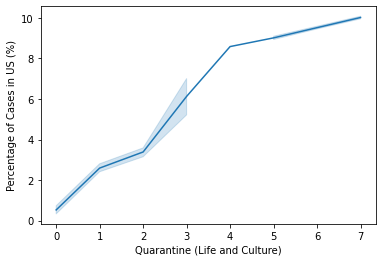

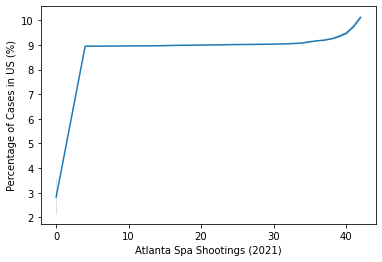

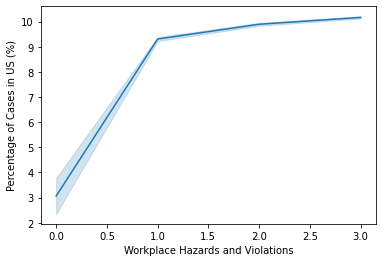

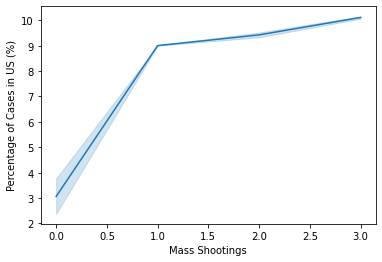

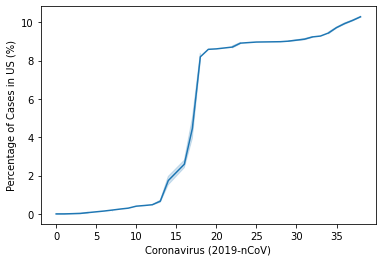

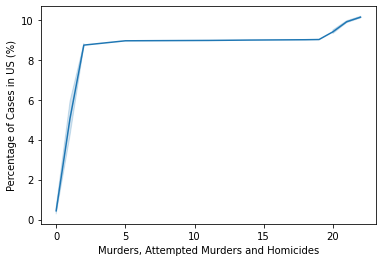

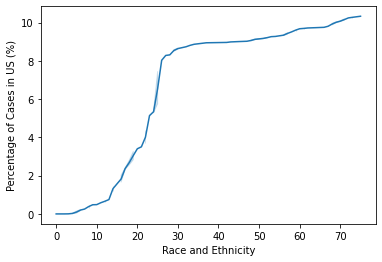

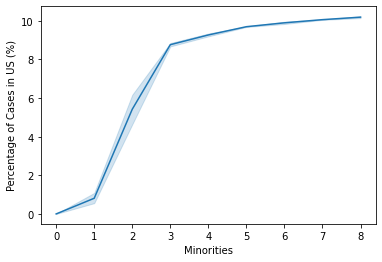

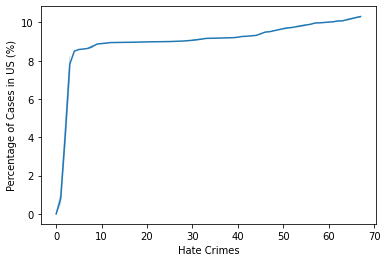

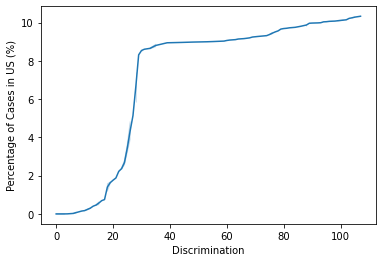

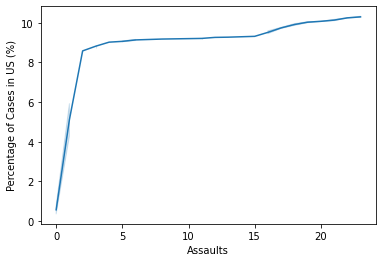

In [65]:
for tag in tags:
    sns.lineplot(data=dateData, x=tag, y="cases", markers=True)
    plt.ylabel("Percentage of Cases in US (%)")
    plt.savefig(tag)
    plt.show()

### Death percentage versus the count for the article

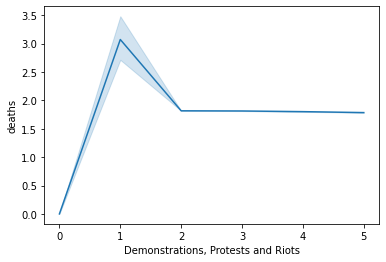

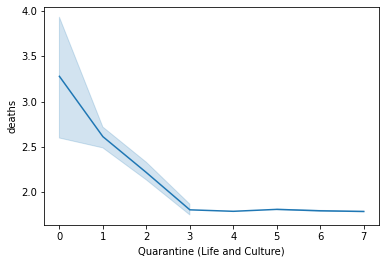

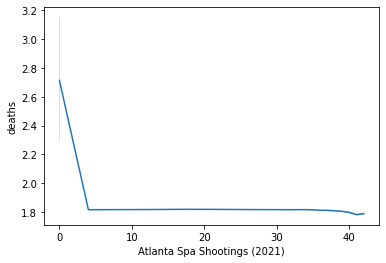

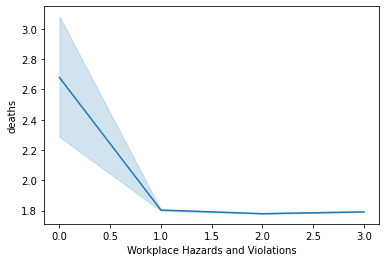

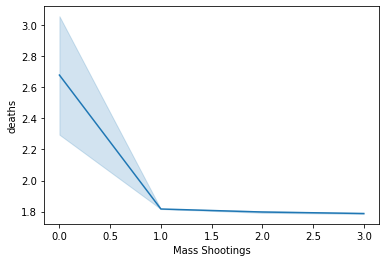

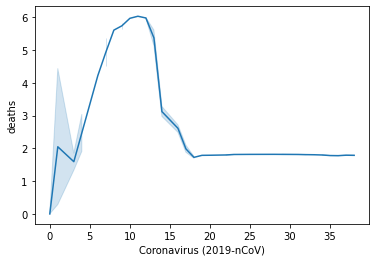

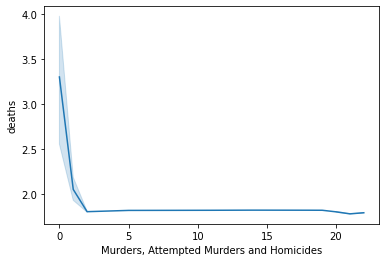

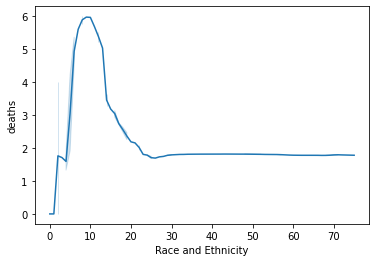

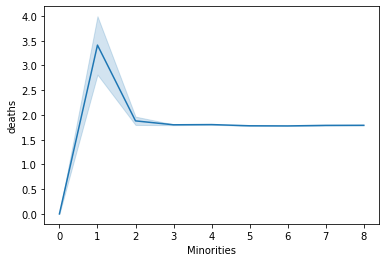

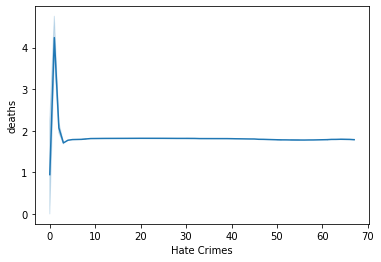

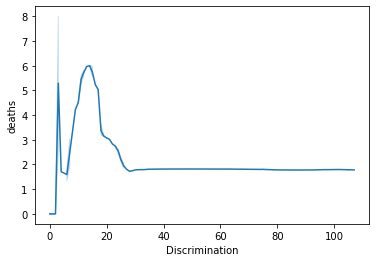

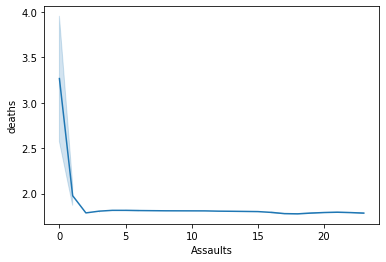

In [48]:
for tag in tags:
    sns.lineplot(data=dateData, x=tag, y="deaths", markers=True)
    plt.show()

#### Create Count For The Program

In [58]:
for tag in tags:
    print(heatmap.iloc[-1, :][tag])

5.0
7.0
42.0
3.0
3.0
38.0
22.0
75.0
8.0
67.0
107.0
23.0


In [59]:
import numpy as np
total = len(updatedData)
# Published
pub = ["yes", "no"] * len(tags)
tagList = []
# Double the tags and create the list
for tag in tags:
    tagList.append(tag)
    tagList.append(tag)
count = [0] * len(tags) * 2
for i, tag in enumerate(tagList):
    # Even index are yes
    if i % 2 == 0:
        count[i] = heatmap.iloc[-1, :][tag]
    else:
        count[i] = total - count[i - 1]
    # Odd index are no
frame = pd.DataFrame({"Subject": tagList, "Published": pub, "Count": count})
frame

Subject Published  Count
0         Demonstrations, Protests and Riots       yes    5.0
1         Demonstrations, Protests and Riots        no  205.0
2              Quarantine (Life and Culture)       yes    7.0
3              Quarantine (Life and Culture)        no  203.0
4               Atlanta Spa Shootings (2021)       yes   42.0
5               Atlanta Spa Shootings (2021)        no  168.0
6           Workplace Hazards and Violations       yes    3.0
7           Workplace Hazards and Violations        no  207.0
8                             Mass Shootings       yes    3.0
9                             Mass Shootings        no  207.0
10                   Coronavirus (2019-nCoV)       yes   38.0
11                   Coronavirus (2019-nCoV)        no  172.0
12  Murders, Attempted Murders and Homicides       yes   22.0
13  Murders, Attempted Murders and Homicides        no  188.0
14                        Race and Ethnicity       yes   75.0
15                        Race and Ethnicity        no  135.0
16                                Minorities       yes    8.0
17                                Minorities        no  202.0
18                               Hate Crimes       yes   67.0
19                               Hate Crimes        no  143.0
20                            Discrimination       yes  107.0
21                            Discrimination        no  103.0
22                                  Assaults       yes   23.0
23                                  Assaults        no  187.0

In [60]:
iterables = [list(tags), ["yes", "no"]]
index = pd.MultiIndex.from_product(iterables, names=["Subjects", "Published"])
index
countTag = pd.DataFrame(index=index, data=count, columns=["Count"])
countTag

Count
Subjects                                 Published       
Demonstrations, Protests and Riots       yes          5.0
                                         no         205.0
Quarantine (Life and Culture)            yes          7.0
                                         no         203.0
Atlanta Spa Shootings (2021)             yes         42.0
                                         no         168.0
Workplace Hazards and Violations         yes          3.0
                                         no         207.0
Mass Shootings                           yes          3.0
                                         no         207.0
Coronavirus (2019-nCoV)                  yes         38.0
                                         no         172.0
Murders, Attempted Murders and Homicides yes         22.0
                                         no         188.0
Race and Ethnicity                       yes         75.0
                                         no         135.0
Minorities                               yes          8.0
                                         no         202.0
Hate Crimes                              yes         67.0
                                         no         143.0
Discrimination                           yes        107.0
                                         no         103.0
Assaults                                 yes         23.0
                                         no         187.0

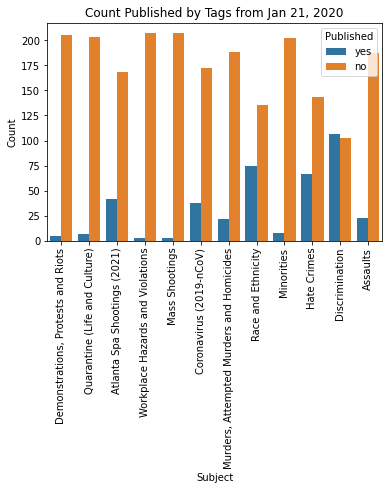

In [62]:
ax = plt.axes()
plot = sns.barplot(x="Subject", y="Count", hue="Published", data=frame, ax=ax)
plt.setp(plot.get_xticklabels(), rotation=90)
ax.set_title("Count Published by Tags from Jan 21, 2020")
plt.savefig("Count Published by Tags from Jan 21, 2020",  bbox_inches="tight")
plt.show()

